In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Import the Excel

In [2]:
# Load the dataset
df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(0%)')
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.028872,-0.130254,-3.184231e+07,-3.115075e+07,-7184.203318,...,-170775.886453,-1059.042606,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.016772,-0.034656,-1.968379e+06,-1.924910e+06,-451.342112,...,-11502.243880,-168.146428,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.015297,-0.094878,-6.059927e+07,-5.928166e+07,-13774.014902,...,-324959.759255,-3804.051175,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.014625,NaN,-2.290124e+06,-2.239814e+06,-510.210093,...,-12199.928822,-901.413470,-0.189720,-1.009642,-253.366805,-0.226133,-3.169102,-3.169102,-92.619013,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.006993,-0.050957,-3.997865e+07,-3.910761e+07,-9330.459280,...,-214438.078273,-4116.308632,-37.818819,-9.136488,-4606.916825,-45.077368,586.030400,586.030400,-1632.997165,0.033005


## Create the Revenue Column based on the Intensity and Total Environmental Cost

In [3]:
df["Revenue"] = df["Total Environmental Cost"]/df["Environmental Intensity (Sales)"]
df["Operating Income"] = df["Total Environmental Cost"]/df["Environmental Intensity (Op Inc)"]
df = df.drop("Industry (Exiobase)", axis=1)
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,-0.028872,-0.130254,-3.184231e+07,-3.115075e+07,-7184.203318,-414256.439748,...,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135,1.102887e+09,244464000.0
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,-0.016772,-0.034656,-1.968379e+06,-1.924910e+06,-451.342112,-25348.722429,...,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215,1.173640e+08,56797000.0
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,-0.015297,-0.094878,-6.059927e+07,-5.928166e+07,-13774.014902,-788289.414697,...,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467,3.961539e+09,638704000.0
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,-0.014625,NaN,-2.290124e+06,-2.239814e+06,-510.210093,-29661.954007,...,-0.189720,-1.009642,-253.366805,-0.226133,-3.169102,-3.169102,-92.619013,0.016390,1.565900e+08,NaN
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,-0.006993,-0.050957,-3.997865e+07,-3.910761e+07,-9330.459280,-520701.497769,...,-37.818819,-9.136488,-4606.916825,-45.077368,586.030400,586.030400,-1632.997165,0.033005,5.717172e+09,784560000.0


## Filter for only the Brewery Category

In [4]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape
filtered_df

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,-6.978419e+08,-2.950986e+08,-77656.206578,-3.917870e+06,...,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202,1.057940e+10,1.500000e+09
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,-1.778566e+09,-1.561186e+09,-391750.191978,-2.104927e+07,...,-3914.291085,-325.789140,-190769.424529,-4665.559245,56659.806086,56659.806086,-64862.799133,0.080199,5.248464e+10,1.547524e+10
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,-2.388141e+08,-1.962082e+08,-60262.712495,-2.577534e+06,...,-1480.449400,-288.844325,-27951.868900,-1764.591400,19253.589023,19132.282417,-8148.334758,0.029599,9.890572e+09,1.487489e+09
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,-5.102237e+08,-4.329371e+08,-113003.339951,-5.803760e+06,...,-1458.522182,-168.769751,-54528.158099,-1738.455701,20656.408130,20656.408130,-18050.980779,0.093336,2.687117e+10,4.108276e+09
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,-4.594560e+08,-4.332461e+08,-113074.003951,-5.807869e+06,...,-1458.522182,-168.769751,-54563.490099,-1738.455701,20656.408130,20656.408130,-18063.841679,0.101854,2.687117e+10,4.372284e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,2010,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.030260,-0.235039,-6.550440e+08,-5.194440e+08,-158621.813510,-6.863692e+06,...,-2301.994560,-140.963088,-76384.211659,-2743.815360,33270.073871,33270.073871,-22119.416745,0.151424,2.164753e+10,2.786953e+09
13370,2010,HEINEKEN NV,NETHERLANDS,Brewers,-0.026705,-0.207432,-5.781028e+08,-5.194440e+08,-158621.813510,-6.863692e+06,...,-2301.994560,-140.963088,-76384.211659,-2743.815360,33270.073871,33270.073871,-22119.416745,0.008737,2.164753e+10,2.786953e+09
13371,2010,CARLSBERG A/S,DENMARK,Brewers,-0.023217,-0.149215,-2.510669e+08,-2.050162e+08,-95878.002031,-2.637642e+06,...,-3229.881860,-307.350204,-43668.262875,-3849.791660,44939.983297,44810.904736,-9029.590738,0.020611,1.081400e+10,1.682586e+09
13373,2010,KIRIN HOLDINGS CO LTD,JAPAN,Brewers,-0.019710,-0.283115,-5.292861e+08,-5.037614e+08,-120417.958111,-6.702247e+06,...,-568.200650,-107.606420,-59377.364941,-677.255150,7619.713272,7619.713272,-20952.815851,0.006961,2.685426e+10,1.869512e+09


# Boxplots

## Absoulte Values

In [9]:
df_abs_box = filtered_df.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_abs_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-2.950986e+08
1,Brewers,Working Capacity,-1.561186e+09
2,Brewers,Working Capacity,-1.962082e+08
3,Brewers,Working Capacity,-4.329371e+08
4,Brewers,Working Capacity,-4.332461e+08
...,...,...,...
555,Brewers,Wood Production Capacity,6.654015e+04
556,Brewers,Wood Production Capacity,6.654015e+04
557,Brewers,Wood Production Capacity,8.987997e+04
558,Brewers,Wood Production Capacity,1.523943e+04


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


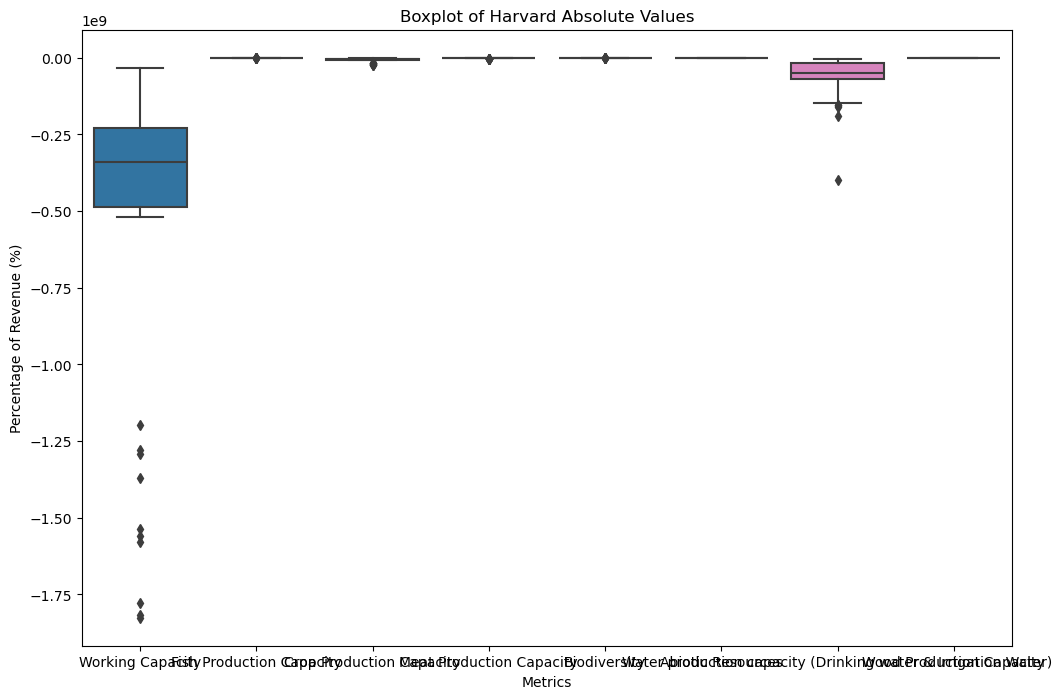

In [10]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_abs_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard Absolute Values')
plt.show()

## Percentage of Revenue

In [11]:
df_rev = filtered_df.copy()
for column in df_rev.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,-6.978419e+08,-2.789370,-0.000734,-0.037033,...,-0.000011,-3.090801e-06,-0.000350,-0.000013,0.000143,0.000143,-0.000116,0.059202,1.057940e+10,1.500000e+09
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,-1.778566e+09,-2.974557,-0.000746,-0.040106,...,-0.000007,-6.207324e-07,-0.000363,-0.000009,0.000108,0.000108,-0.000124,0.080199,5.248464e+10,1.547524e+10
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,-2.388141e+08,-1.983790,-0.000609,-0.026061,...,-0.000015,-2.920401e-06,-0.000283,-0.000018,0.000195,0.000193,-0.000082,0.029599,9.890572e+09,1.487489e+09
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,-5.102237e+08,-1.611158,-0.000421,-0.021598,...,-0.000005,-6.280700e-07,-0.000203,-0.000006,0.000077,0.000077,-0.000067,0.093336,2.687117e+10,4.108276e+09
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,-4.594560e+08,-1.612308,-0.000421,-0.021614,...,-0.000005,-6.280700e-07,-0.000203,-0.000006,0.000077,0.000077,-0.000067,0.101854,2.687117e+10,4.372284e+09


In [12]:
df_rev_box = df_rev.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_rev_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-2.789370
1,Brewers,Working Capacity,-2.974557
2,Brewers,Working Capacity,-1.983790
3,Brewers,Working Capacity,-1.611158
4,Brewers,Working Capacity,-1.612308
...,...,...,...
555,Brewers,Wood Production Capacity,0.000307
556,Brewers,Wood Production Capacity,0.000307
557,Brewers,Wood Production Capacity,0.000831
558,Brewers,Wood Production Capacity,0.000057


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


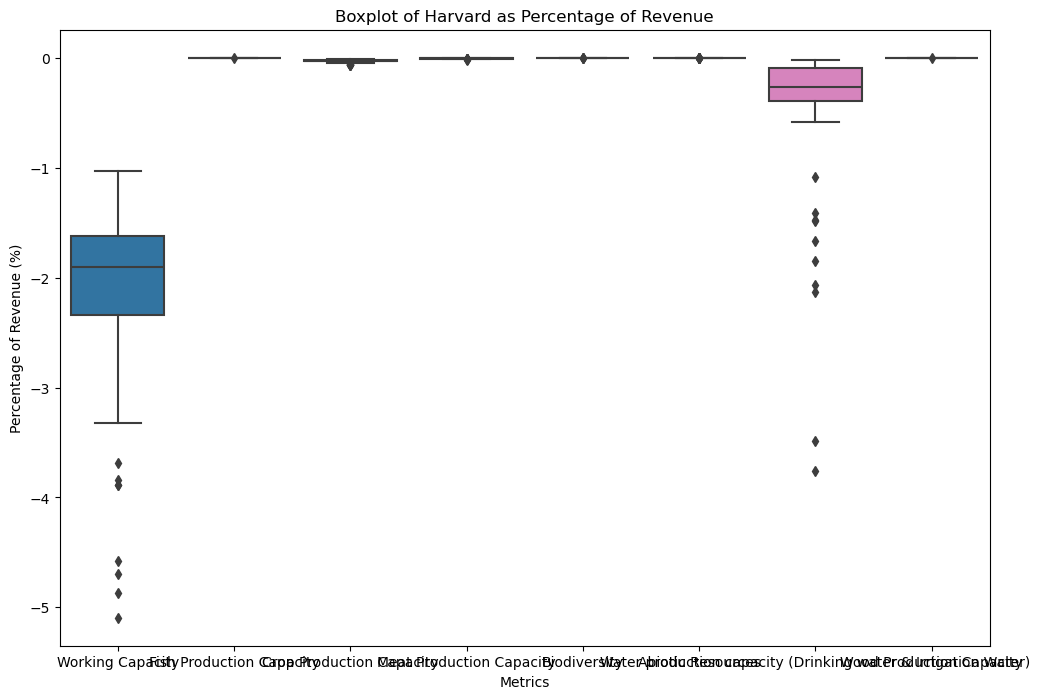

In [13]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_rev_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard as Percentage of Revenue')
plt.show()

## Percentage of Op Income

In [17]:
df_opinc = filtered_df.copy()
for column in df_opinc.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_opinc[column] = (df_opinc[column] / df_opinc['Operating Income'])*100
df_opinc.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,-6.978419e+08,-19.673242,-0.005177,-0.261191,...,-0.000074,-0.000022,-0.002468,-0.000088,0.001012,0.001012,-0.000817,0.059202,1.057940e+10,1.500000e+09
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,-1.778566e+09,-10.088280,-0.002531,-0.136019,...,-0.000025,-0.000002,-0.001233,-0.000030,0.000366,0.000366,-0.000419,0.080199,5.248464e+10,1.547524e+10
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,-2.388141e+08,-13.190567,-0.004051,-0.173281,...,-0.000100,-0.000019,-0.001879,-0.000119,0.001294,0.001286,-0.000548,0.029599,9.890572e+09,1.487489e+09
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,-5.102237e+08,-10.538169,-0.002751,-0.141270,...,-0.000036,-0.000004,-0.001327,-0.000042,0.000503,0.000503,-0.000439,0.093336,2.687117e+10,4.108276e+09
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,-4.594560e+08,-9.908918,-0.002586,-0.132834,...,-0.000033,-0.000004,-0.001248,-0.000040,0.000472,0.000472,-0.000413,0.101854,2.687117e+10,4.372284e+09


In [20]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-19.673242
1,Brewers,Working Capacity,-10.088280
2,Brewers,Working Capacity,-13.190567
3,Brewers,Working Capacity,-10.538169
4,Brewers,Working Capacity,-9.908918
...,...,...,...
555,Brewers,Wood Production Capacity,0.002388
556,Brewers,Wood Production Capacity,0.002388
557,Brewers,Wood Production Capacity,0.005342
558,Brewers,Wood Production Capacity,0.000815


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


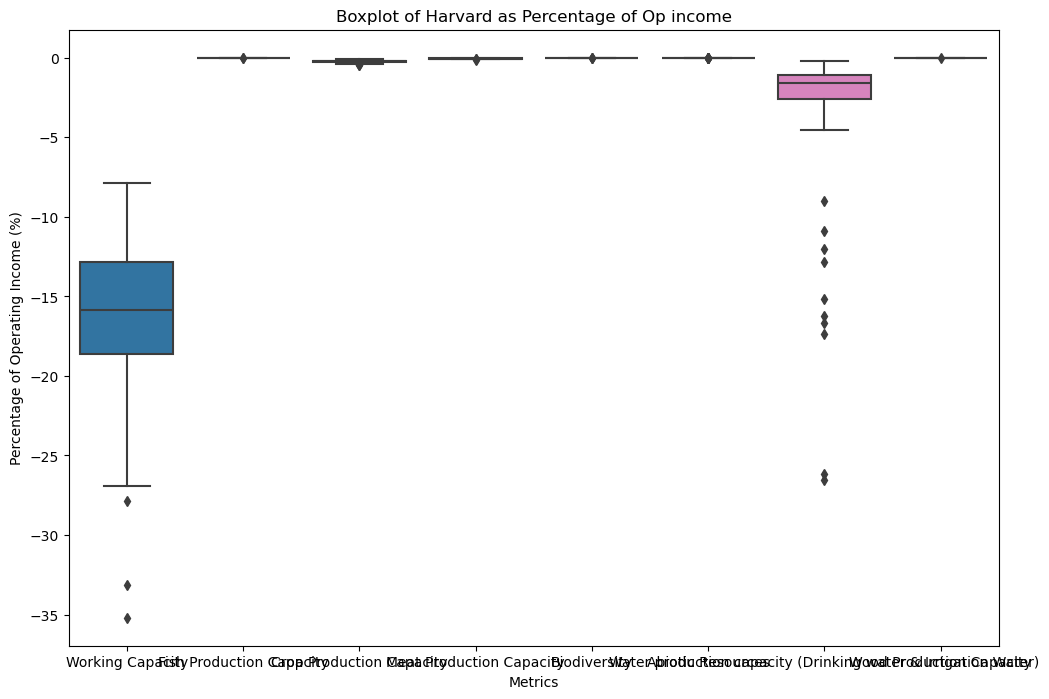

In [21]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

## On Total Environmental Cost

In [22]:
df_cost = filtered_df.copy()
for column in df_cost.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_cost[column] = (df_cost[column] / df_cost['Total Environmental Cost']) * 100
df_cost.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,-6.978419e+08,42.287318,0.011128,0.561427,...,0.000160,0.000047,0.005306,0.000190,-0.002175,-0.002175,0.001757,0.059202,1.057940e+10,1.500000e+09
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,-1.778566e+09,87.777779,0.022026,1.183497,...,0.000220,0.000018,0.010726,0.000262,-0.003186,-0.003186,0.003647,0.080199,5.248464e+10,1.547524e+10
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,-2.388141e+08,82.159411,0.025234,1.079306,...,0.000620,0.000121,0.011704,0.000739,-0.008062,-0.008011,0.003412,0.029599,9.890572e+09,1.487489e+09
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,-5.102237e+08,84.852395,0.022148,1.137493,...,0.000286,0.000033,0.010687,0.000341,-0.004049,-0.004049,0.003538,0.093336,2.687117e+10,4.108276e+09
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,-4.594560e+08,94.295450,0.024610,1.264075,...,0.000317,0.000037,0.011876,0.000378,-0.004496,-0.004496,0.003932,0.101854,2.687117e+10,4.372284e+09


In [23]:
df_melted = df_cost.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_melted

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,42.287318
1,Brewers,Working Capacity,87.777779
2,Brewers,Working Capacity,82.159411
3,Brewers,Working Capacity,84.852395
4,Brewers,Working Capacity,94.295450
...,...,...,...
555,Brewers,Wood Production Capacity,-0.010158
556,Brewers,Wood Production Capacity,-0.011510
557,Brewers,Wood Production Capacity,-0.035799
558,Brewers,Wood Production Capacity,-0.002879


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


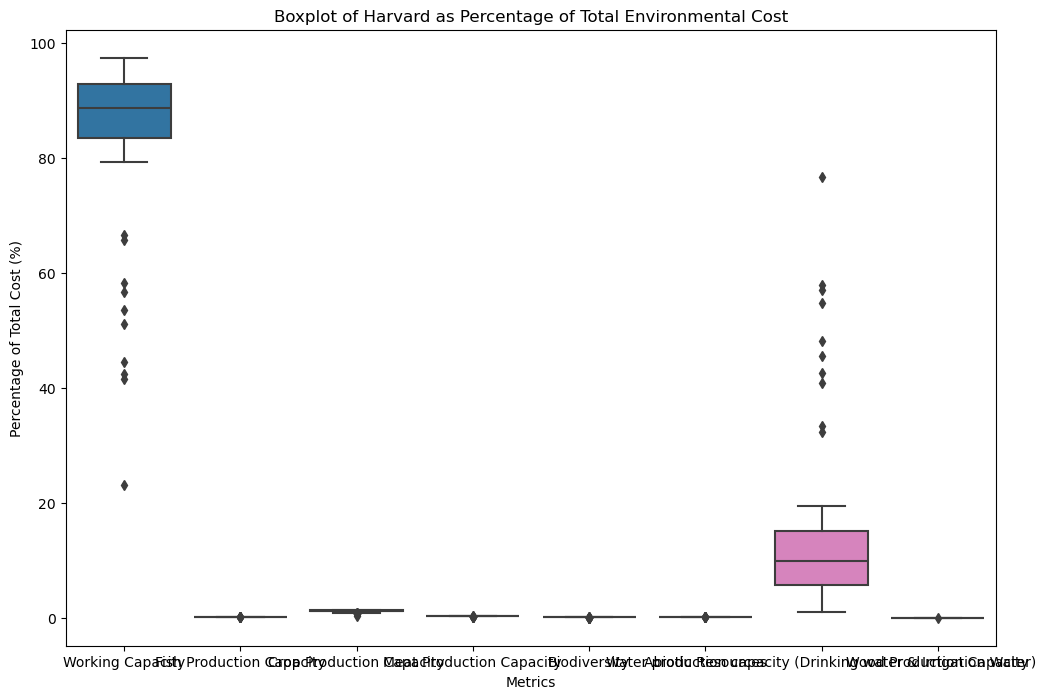

In [24]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Total Cost (%)')
plt.title('Boxplot of Harvard as Percentage of Total Environmental Cost')
plt.show()

## On SDGs

In [25]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=df_opinc.loc[:,"SDG 1.5":"SDG 6"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,SDG 1.5,-8.748568
1,Brewers,SDG 1.5,-4.501238
2,Brewers,SDG 1.5,-5.842610
3,Brewers,SDG 1.5,-4.716872
4,Brewers,SDG 1.5,-4.435221
...,...,...,...
625,Brewers,SDG 6,-4.551475
626,Brewers,SDG 6,-1.790711
627,Brewers,SDG 6,-2.518710
628,Brewers,SDG 6,-0.914156


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


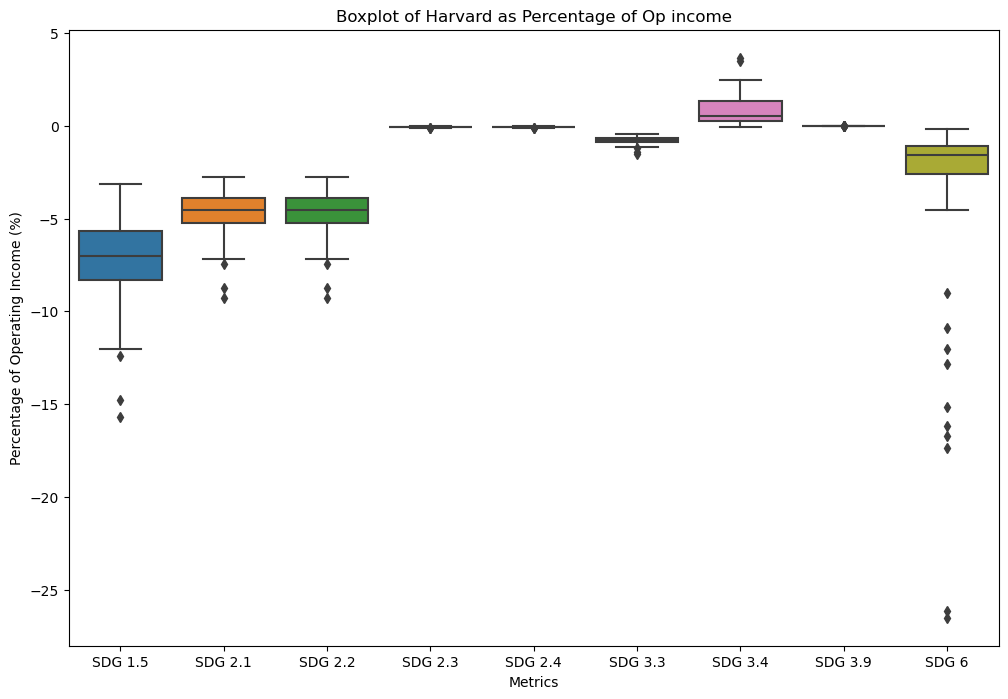

In [26]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

# Further Analysis here

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

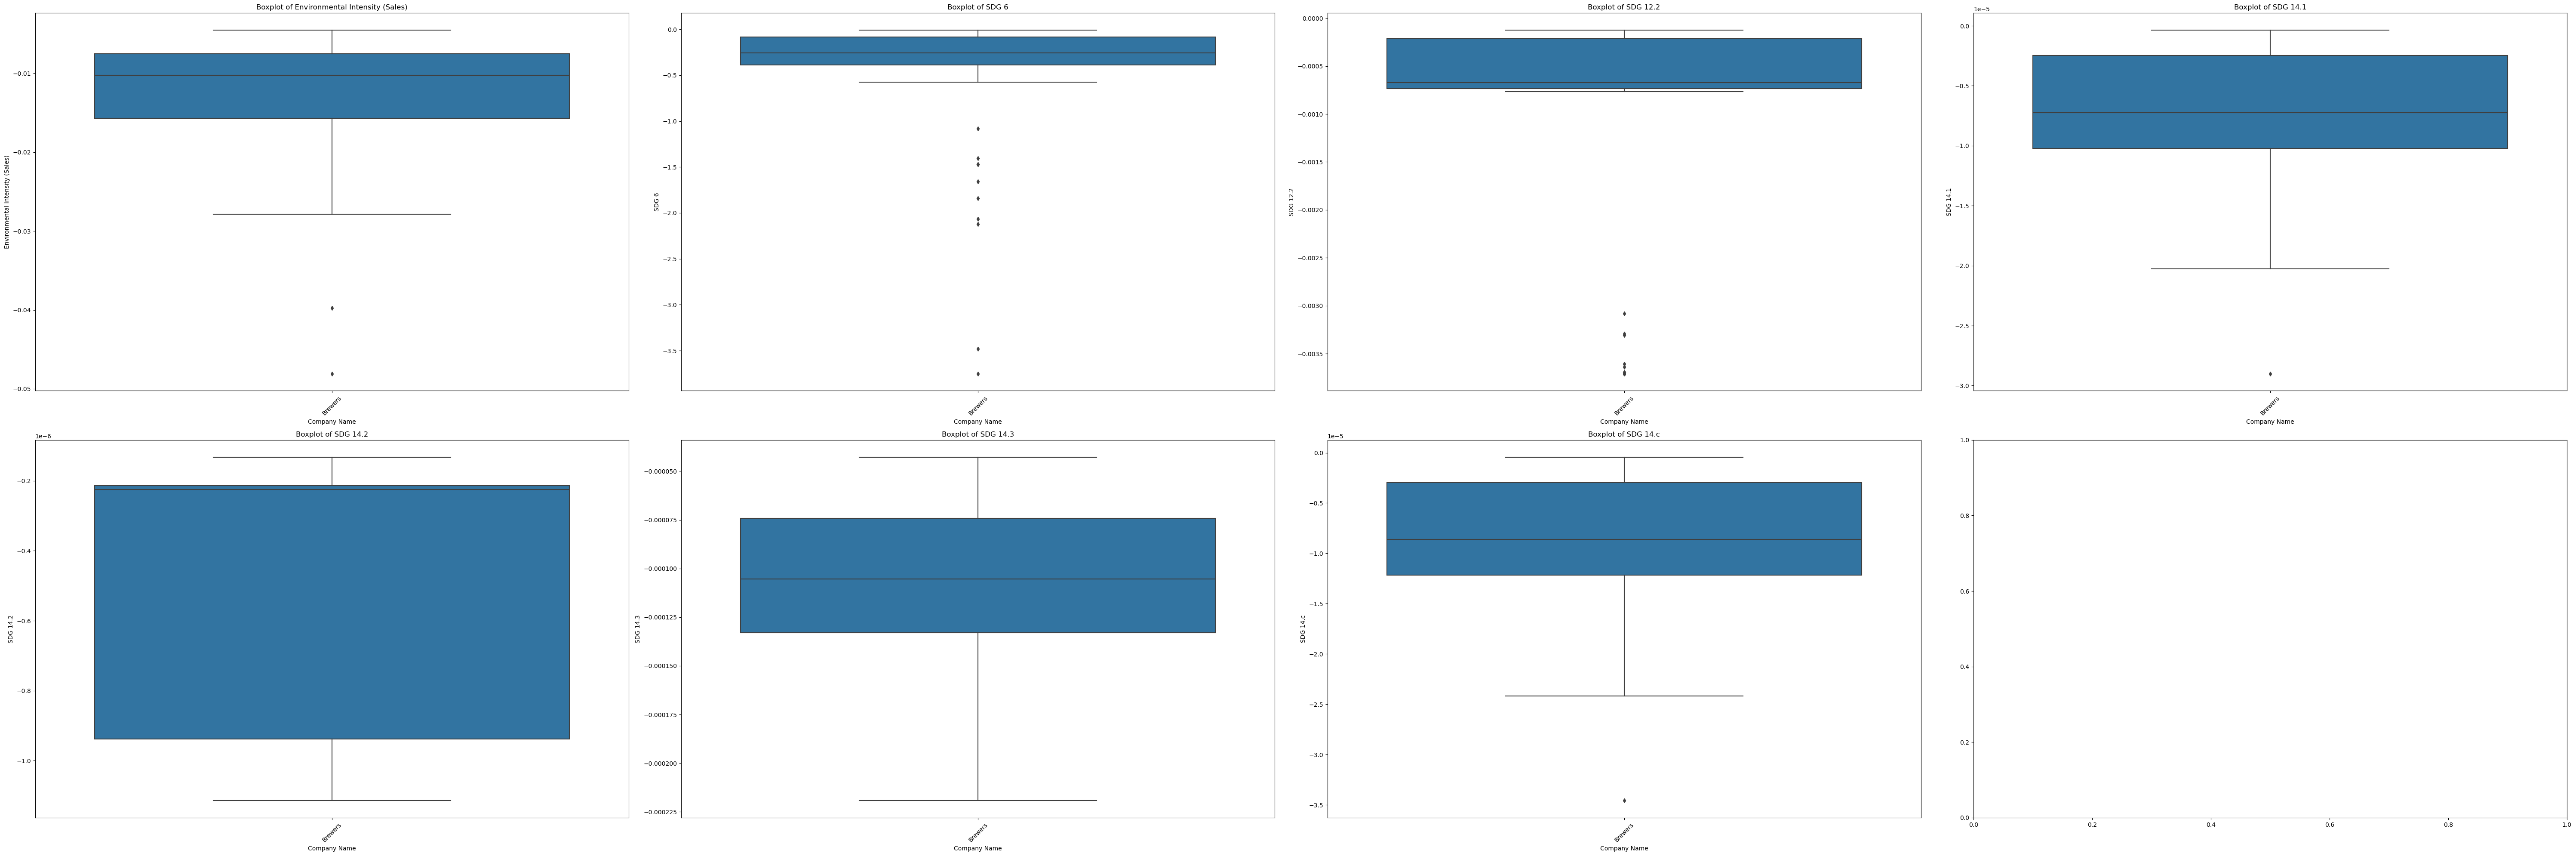

In [20]:
# List of y variables
y_vars = ["Environmental Intensity (Sales)", "SDG 6", "SDG 12.2", "SDG 14.1", "SDG 14.2", "SDG 14.3", "SDG 14.c"]

# Number of rows and columns for the subplot grid
nrows = 2
ncols = 4

# Create a grid of subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15 * ncols, 10 * nrows))

# Loop through each y variable and create a boxplot on the corresponding subplot axis
for i, y_var in enumerate(y_vars):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x="GICS Sub-Industry", y=y_var, data=filtered_df, ax=axes[row, col])
    axes[row, col].set_xlabel("Company Name")
    axes[row, col].set_ylabel(y_var)
    axes[row, col].set_title(f"Boxplot of {y_var}")
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-labels for better visibility

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


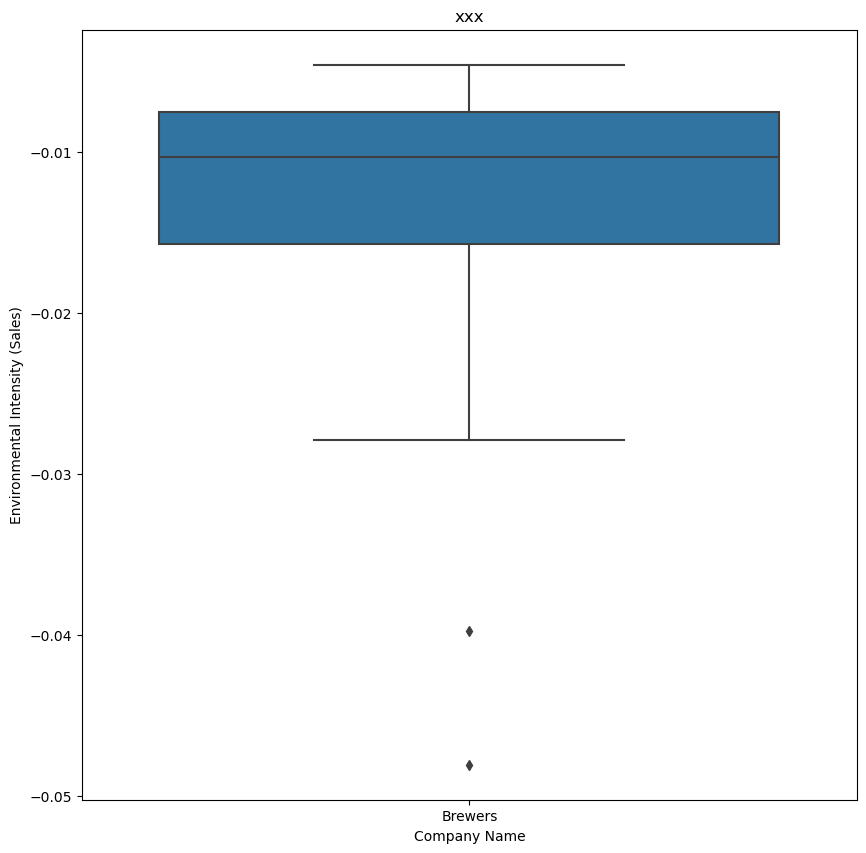

In [15]:
# Create a boxplot of Total Knowledge by Training Type
plt.figure(figsize=(10, 10))
sns.boxplot(x="GICS Sub-Industry", y="Environmental Intensity (Sales)", data=filtered_df)
plt.xlabel("Company Name")
plt.ylabel("Environmental Intensity (Sales)")
plt.title("xxx")
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

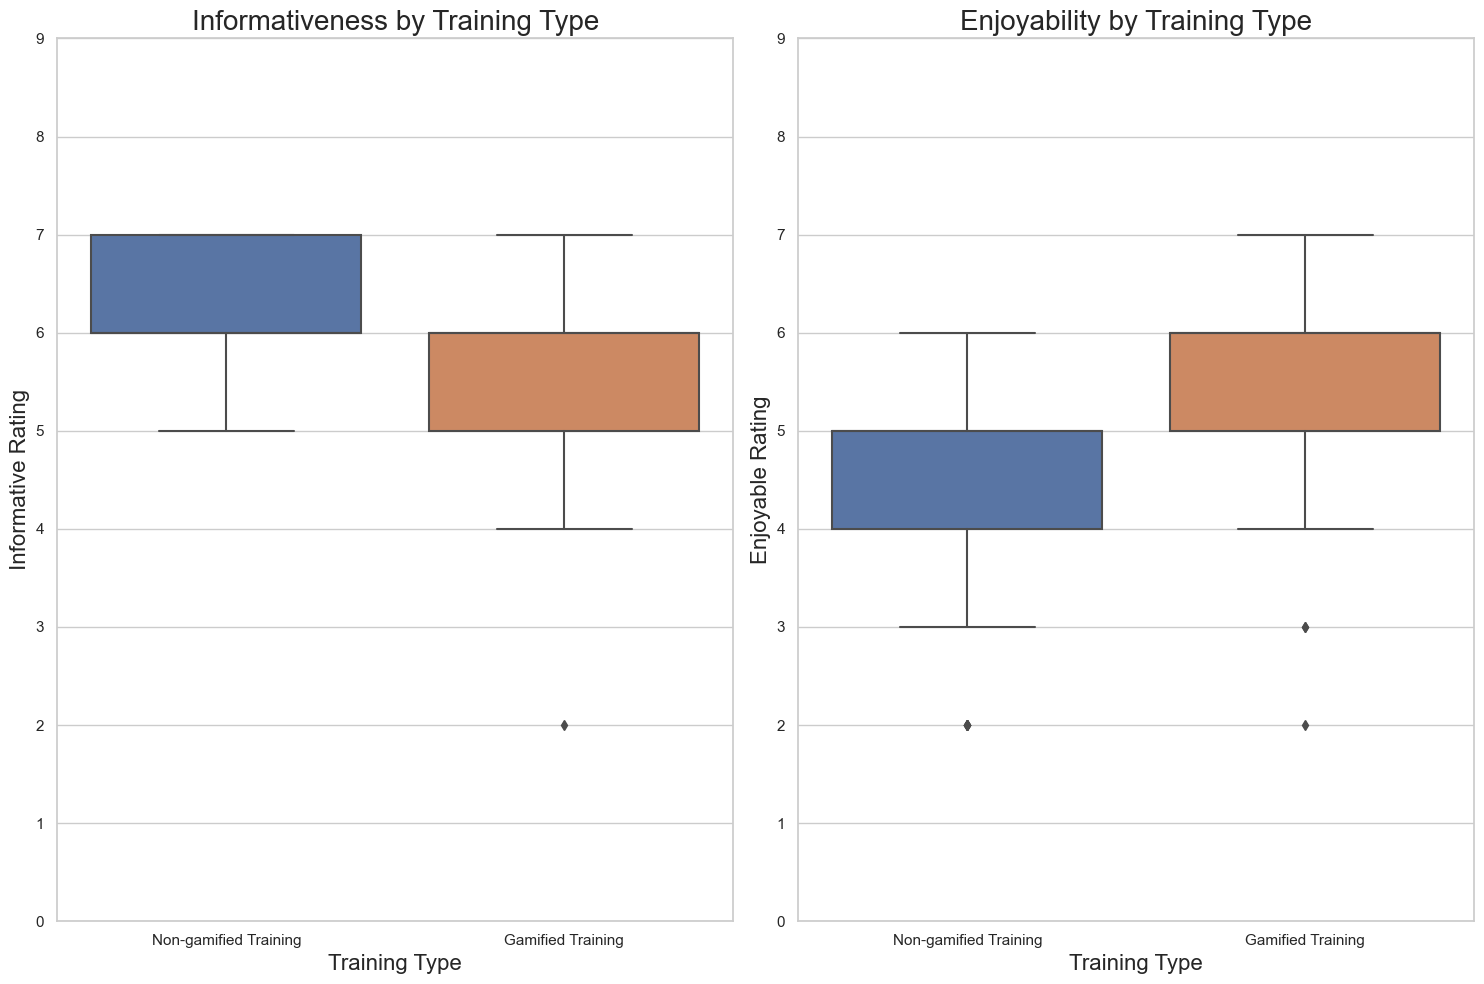

In [50]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot for Informativeness by Training Type
sns.boxplot(x="TypeOfTraining", y="Informative", data=data, ax=axes[0])
axes[0].set_xlabel("Training Type", fontsize=16)
axes[0].set_ylabel("Informative Rating", fontsize=16)
axes[0].set_title("Informativeness by Training Type", fontsize=20)
axes[0].set_ylim(0, 9)  # Set the y-axis limits

# Boxplot for Enjoyability by Training Type
sns.boxplot(x="TypeOfTraining", y="Enjoyable", data=data, ax=axes[1])
axes[1].set_xlabel("Training Type", fontsize=16)
axes[1].set_ylabel("Enjoyable Rating", fontsize=16)
axes[1].set_title("Enjoyability by Training Type", fontsize=20)
axes[1].set_ylim(0, 9)  # Set the y-axis limits

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

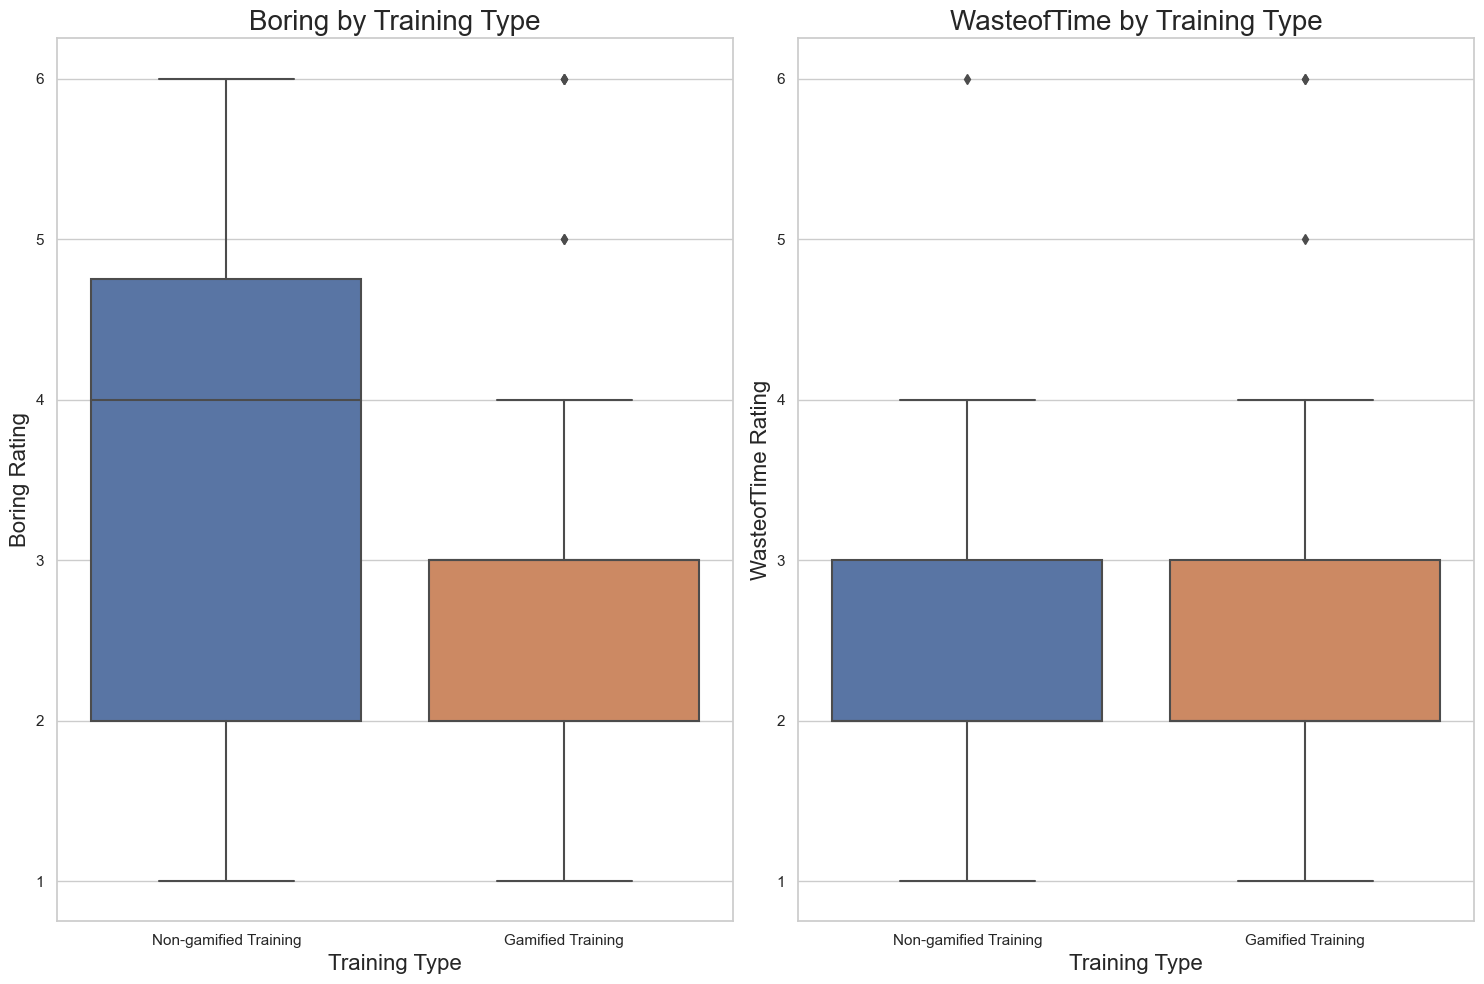

In [36]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot for Informativeness by Training Type
sns.boxplot(x="TypeOfTraining", y="Boring", data=data, ax=axes[0])
axes[0].set_xlabel("Training Type", fontsize=16)
axes[0].set_ylabel("Boring Rating", fontsize=16)
axes[0].set_title("Boring by Training Type", fontsize=20)

# Boxplot for Enjoyability by Training Type
sns.boxplot(x="TypeOfTraining", y="WasteofTime", data=data, ax=axes[1])
axes[1].set_xlabel("Training Type", fontsize=16)
axes[1].set_ylabel("WasteofTime Rating", fontsize=16)
axes[1].set_title("WasteofTime by Training Type", fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

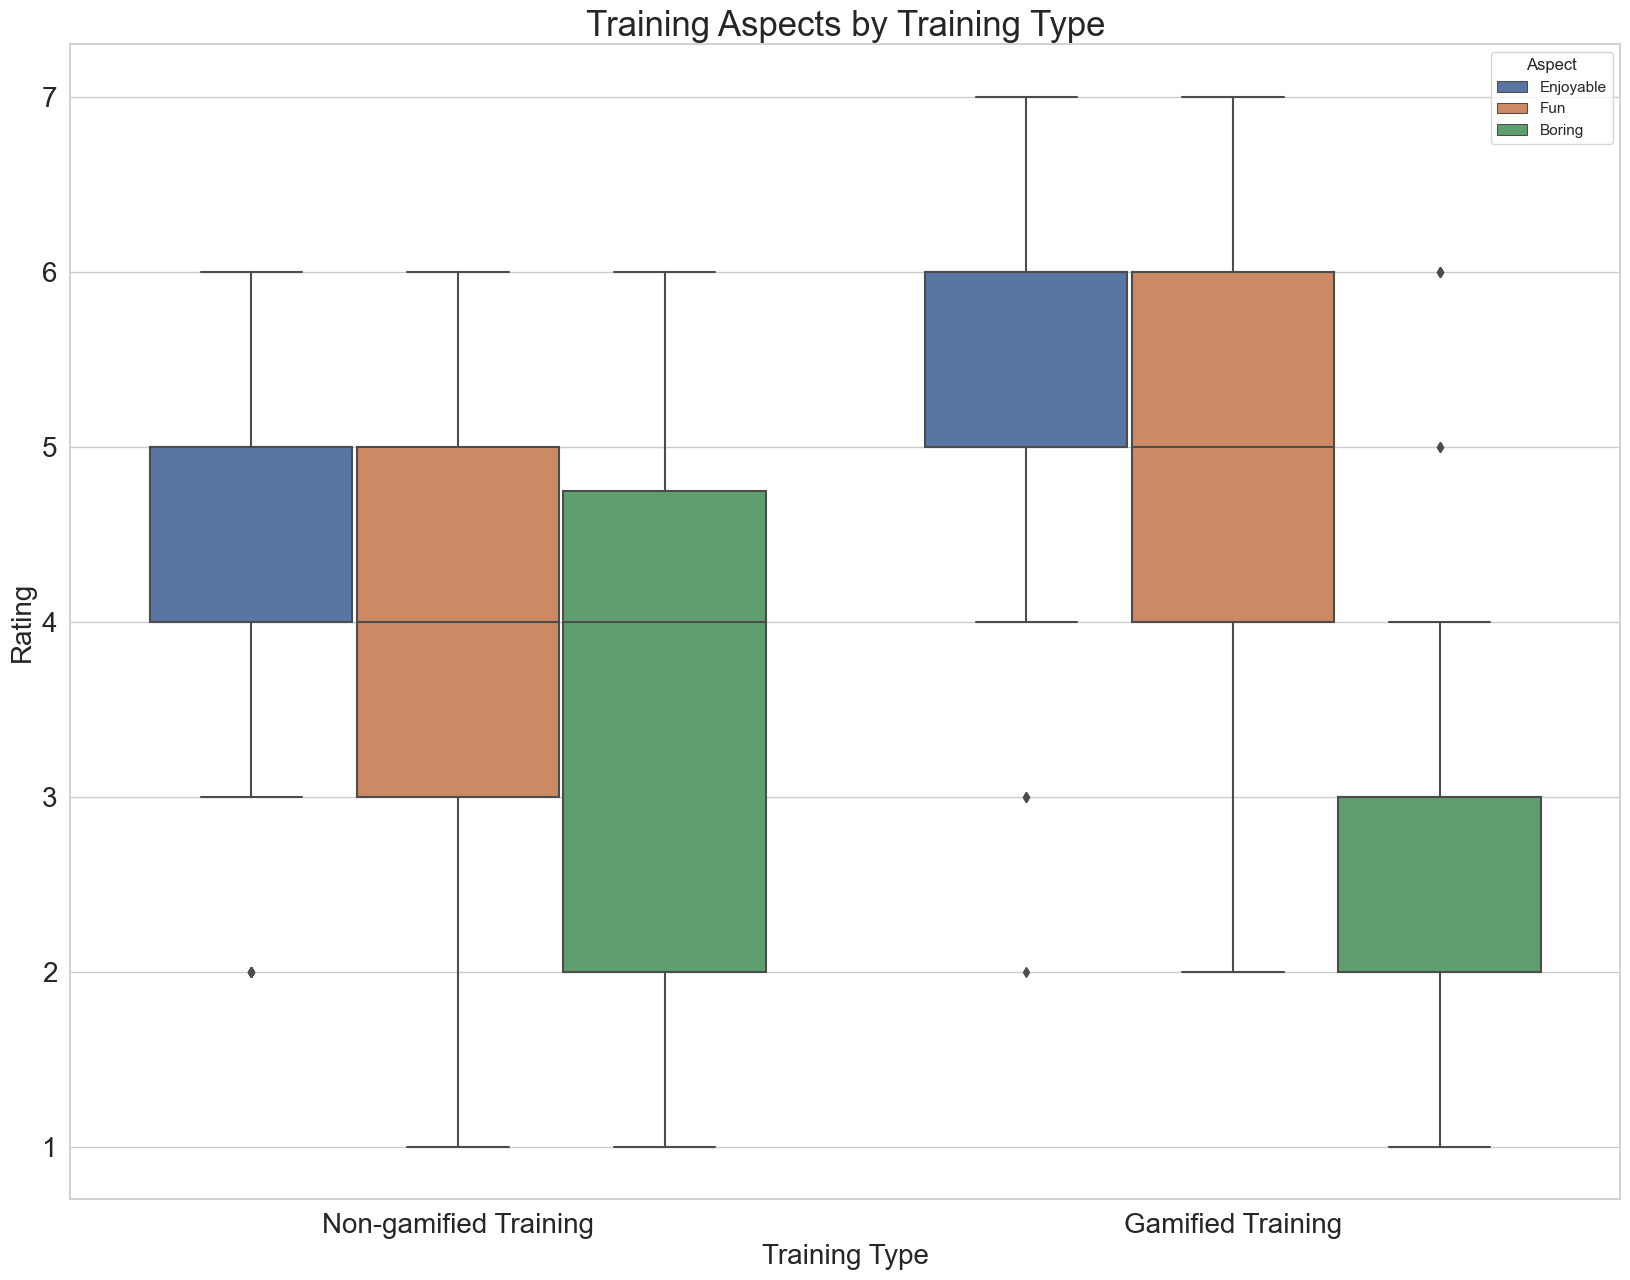

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["Enjoyable", "Fun", "Boring"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Training Aspects by Training Type", fontsize=25)
plt.legend(title="Aspect")
ax.tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
ax.tick_params(axis='y', labelsize=20) 

# Show the plot
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

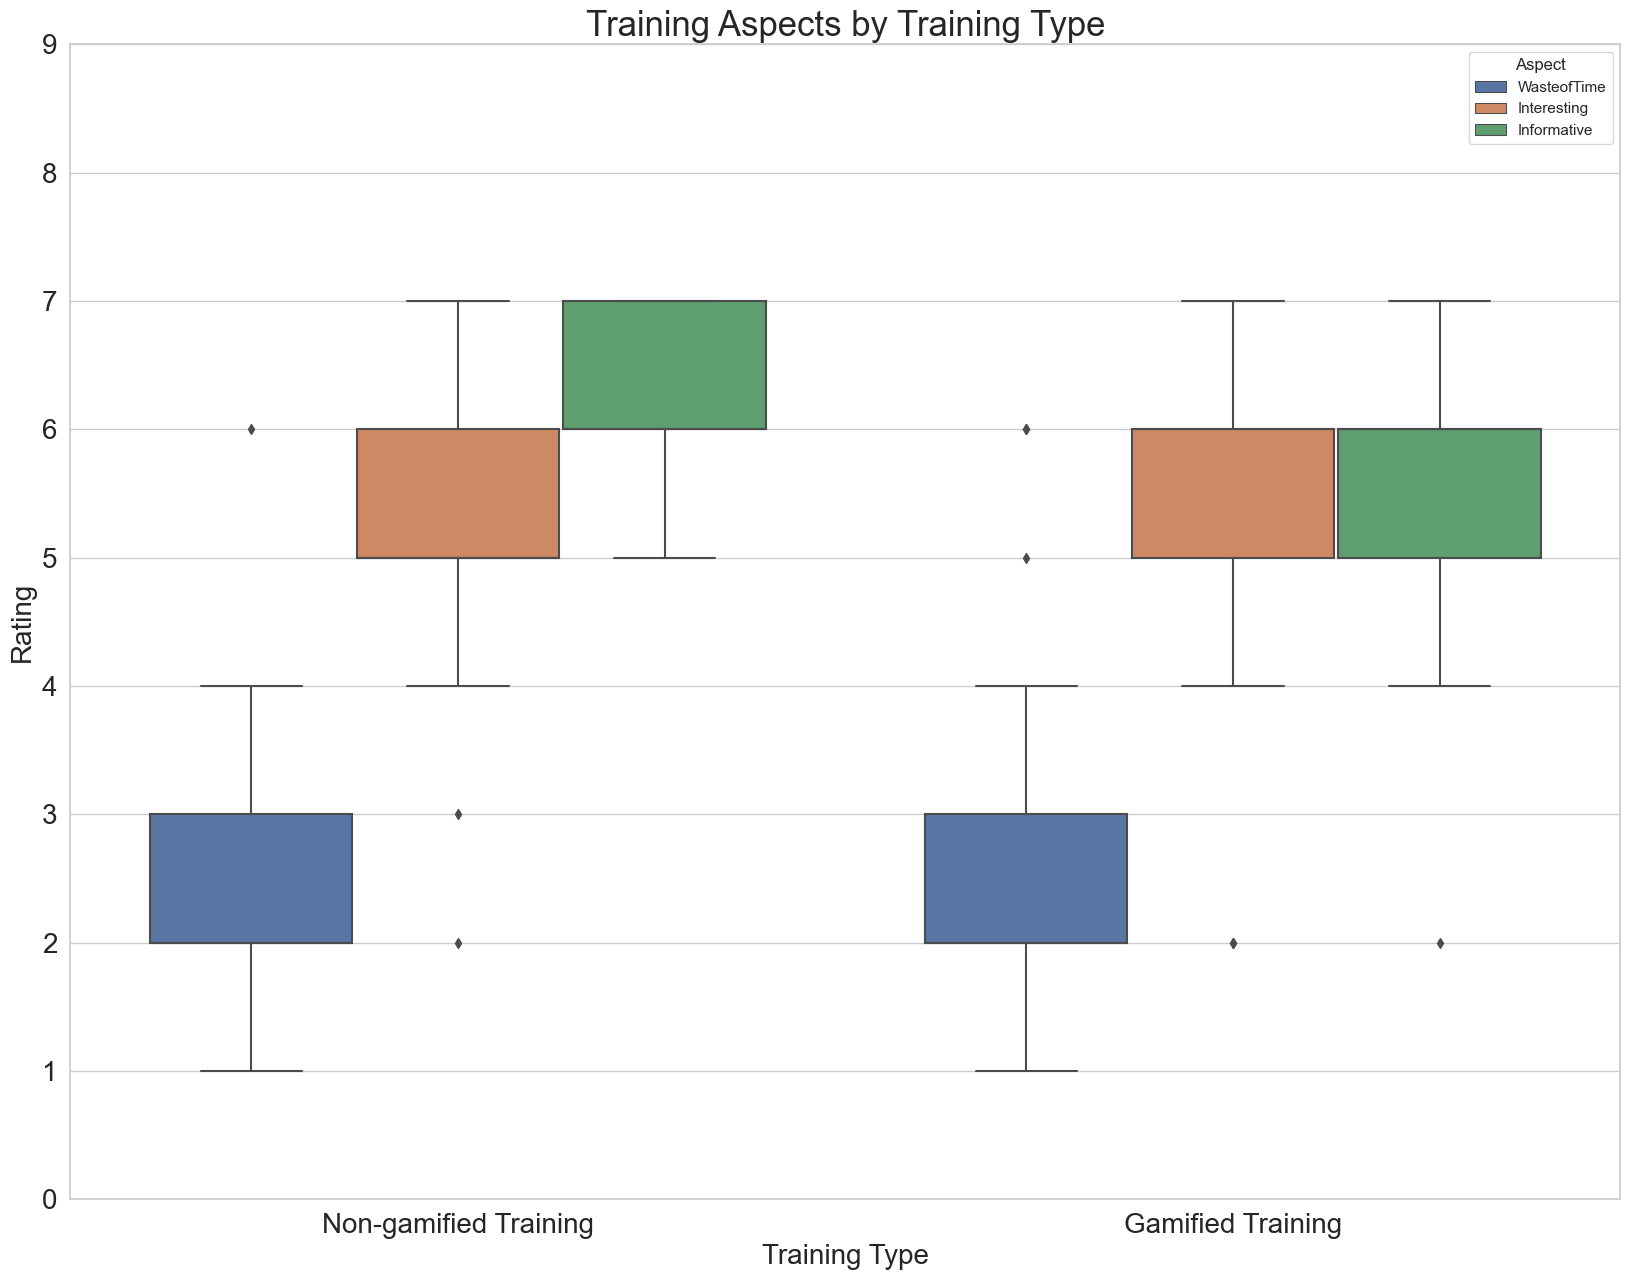

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Training Aspects by Training Type", fontsize=25)
plt.legend(title="Aspect")
ax.tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
ax.tick_params(axis='y', labelsize=20) 
plt.ylim(0, 9)

# Show the plot
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

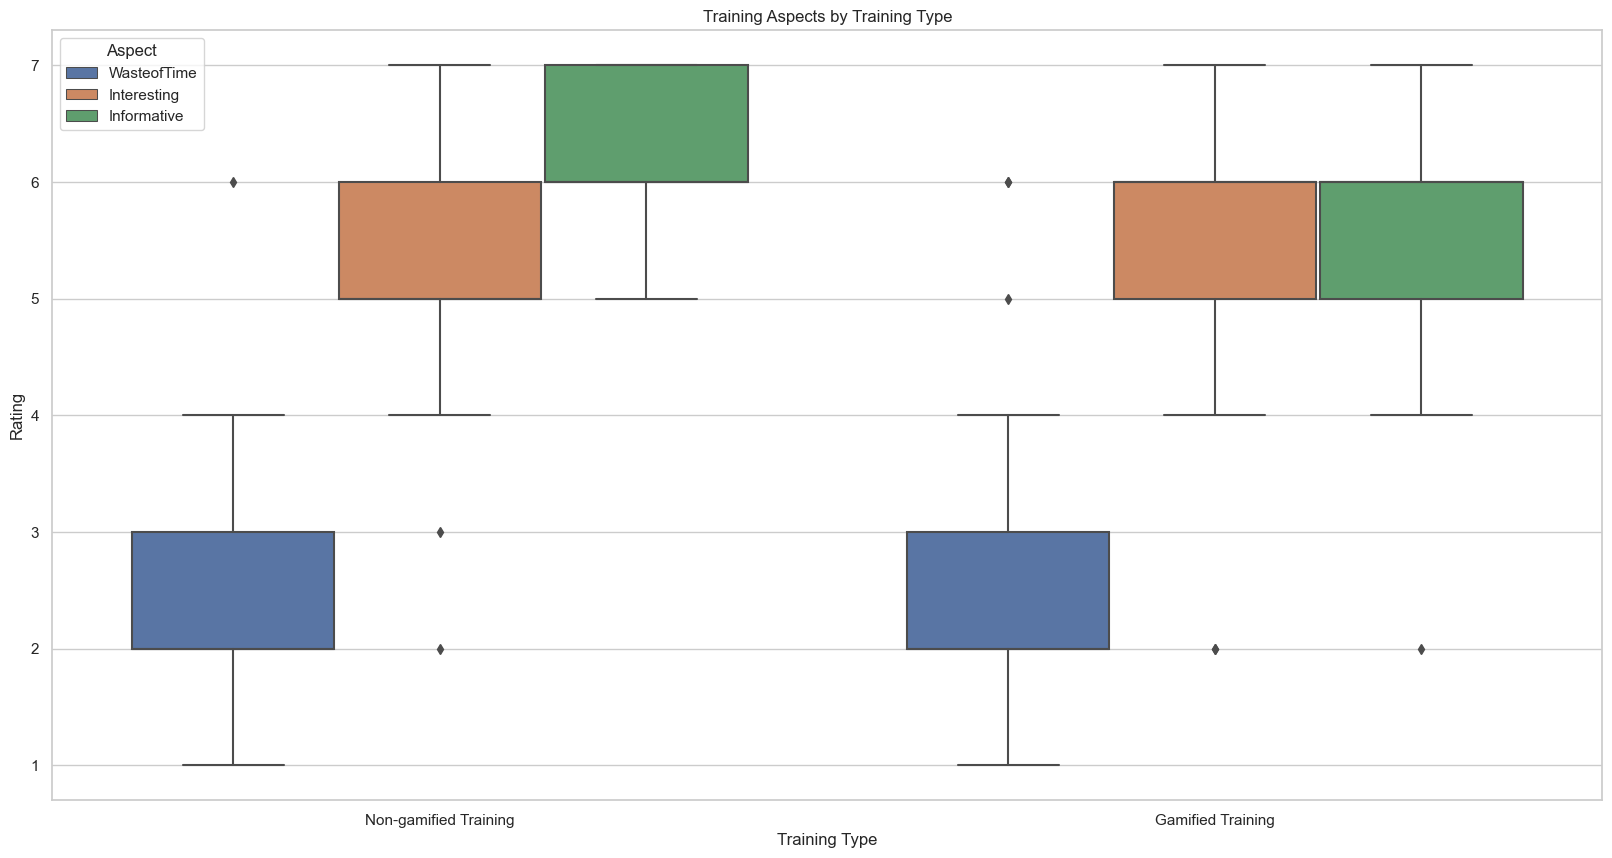

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 10))
sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type")
plt.ylabel("Rating")
plt.title("Training Aspects by Training Type")
plt.legend(title="Aspect")

# Show the plot
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

NameError: name 'np' is not defined

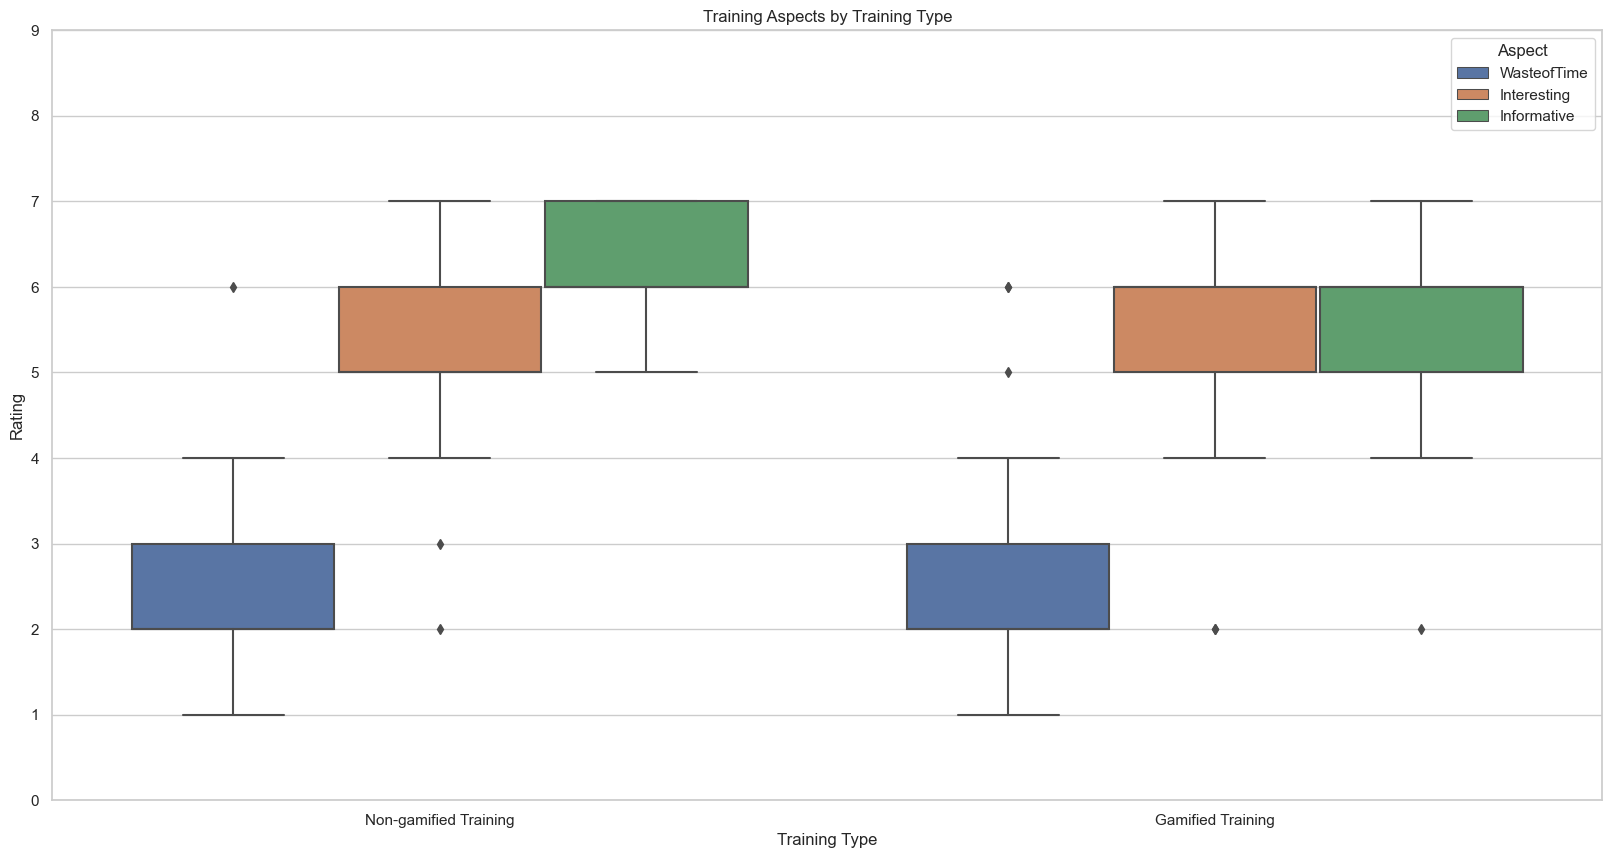

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type")
plt.ylabel("Rating")
plt.title("Training Aspects by Training Type")
plt.legend(title="Aspect")
plt.ylim(0, 9)

# Add mean lines
medians = combined_data.groupby(['TypeOfTraining', 'Aspect'])['Rating'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 9, median_labels[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

# Set the y-axis limit to 9

# Show the plot
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

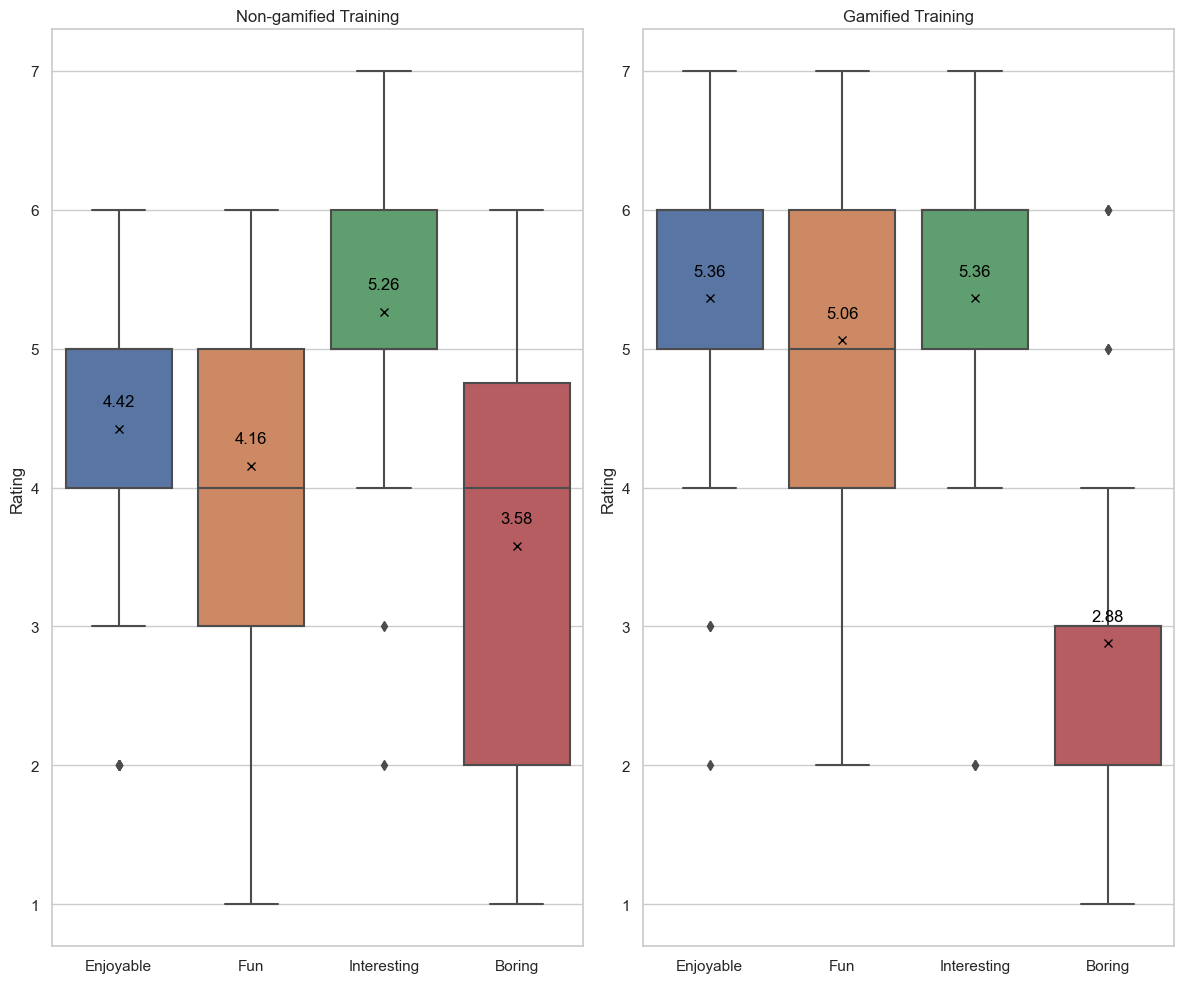

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Gamified Training" and "Non-gamified Training"
gamified_data = data[data['TypeOfTraining'] == 'Gamified Training']
non_gamified_data = data[data['TypeOfTraining'] == 'Non-gamified Training']

# Create a figure with two subplots (one for each training type)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the box plots for each training type
sns.boxplot(data=non_gamified_data[['Enjoyable', 'Fun', 'Interesting', 'Boring']], ax=axes[0], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})
sns.boxplot(data=gamified_data[['Enjoyable', 'Fun', 'Interesting', 'Boring']], ax=axes[1], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate and display the mean values
for ax, data_type in zip(axes, ['Non-gamified Training', 'Gamified Training']):
    means = data[data['TypeOfTraining'] == data_type][['Enjoyable', 'Fun', 'Interesting', 'Boring']].mean()
    offset = 0.25
    for i, mean in enumerate(means):
        ax.text(i, mean + offset, f'{mean:.2f}', ha='center', va='top', fontsize=12, color='black')

# Set titles and labels
axes[0].set_title('Non-gamified Training')
axes[1].set_title('Gamified Training')
axes[0].set_ylabel('Rating')
axes[1].set_ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

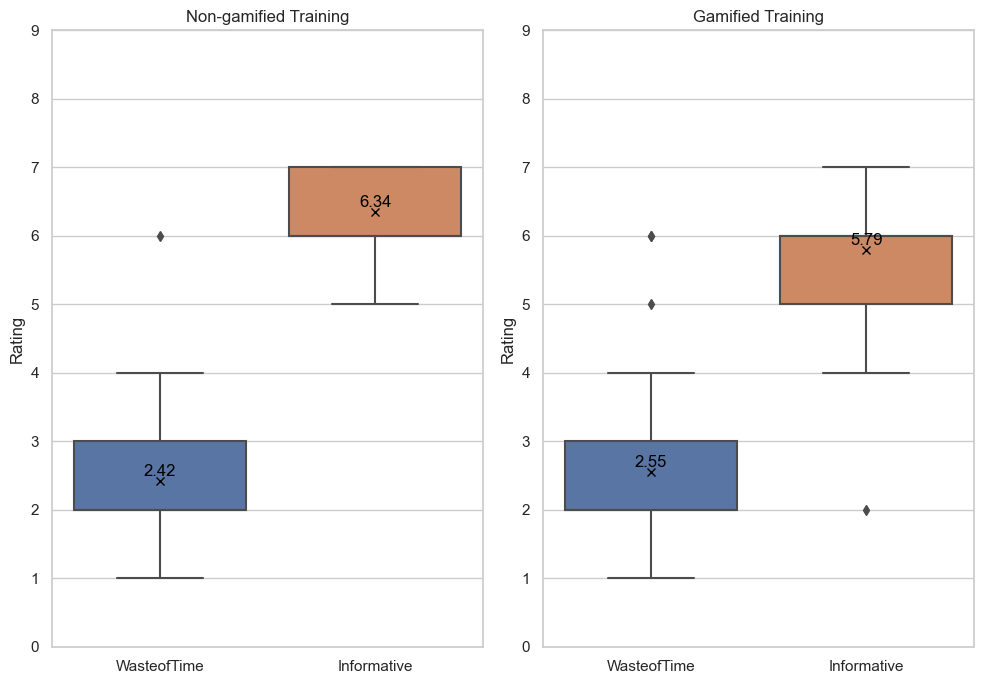

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Gamified Training" and "Non-gamified Training"
gamified_data = data[data['TypeOfTraining'] == 'Gamified Training']
non_gamified_data = data[data['TypeOfTraining'] == 'Non-gamified Training']

# Create a figure with two subplots (one for each training type)
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot the box plots for each training type
sns.boxplot(data=non_gamified_data[["WasteofTime", "Informative"]], ax=axes[0], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})
sns.boxplot(data=gamified_data[["WasteofTime", "Informative"]], ax=axes[1], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate and display the mean values
for ax, data_type in zip(axes, ['Non-gamified Training', 'Gamified Training']):
    means = data[data['TypeOfTraining'] == data_type][["WasteofTime", "Informative"]].mean()
    offset = 0.2
    for i, mean in enumerate(means):
        ax.text(i, mean + offset, f'{mean:.2f}', ha='center', va='top', fontsize=12, color='black')

# Set titles and labels
axes[0].set_ylim(0, 9)
axes[1].set_ylim(0, 9)
axes[0].set_title('Non-gamified Training')
axes[1].set_title('Gamified Training')
axes[0].set_ylabel('Rating')
axes[1].set_ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


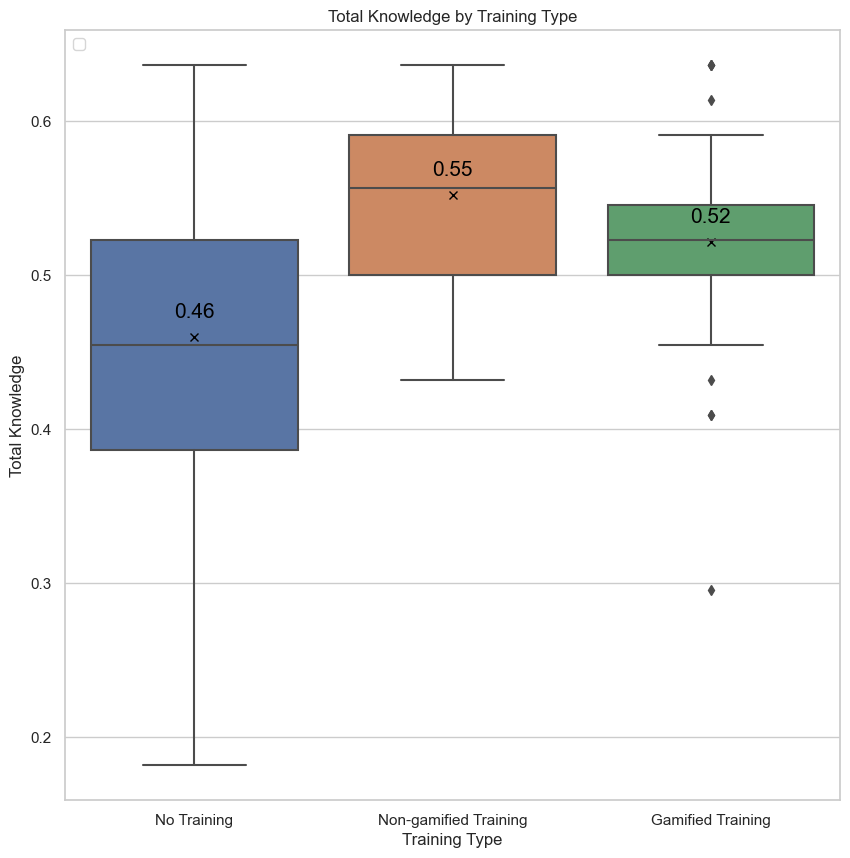

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map training types to colors

# Create a boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x='TypeOfTraining', y='TotalKnowledge', data=data)

averages = data.groupby('TypeOfTraining')['TotalKnowledge'].mean()
new_order = ['No Training', 'Non-gamified Training', 'Gamified Training']
averages = averages[new_order]
for i, avg in enumerate(averages):
    plt.plot(i, avg, 'x', markeredgecolor='black' ,markerfacecolor='black')
    plt.text(i, avg + 0.01, f'{avg:.2f}', ha='center', va='bottom', fontsize=15, color='black')

# Customize the plot
plt.title('Total Knowledge by Training Type')
plt.xlabel('Training Type')
plt.ylabel('Total Knowledge')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [100]:
averages

TypeOfTraining
Gamified Training        0.521349
No Training              0.459596
Non-gamified Training    0.552033
Name: TotalKnowledge, dtype: float64

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


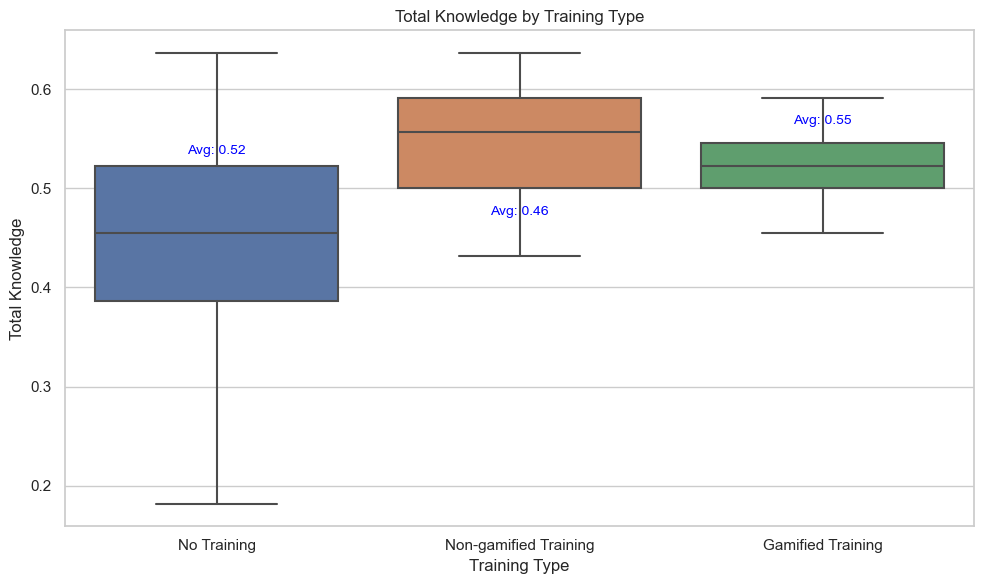

In [89]:


# Create the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='TypeOfTraining', y='TotalKnowledge', data=data, showfliers=False)  # showfliers=False removes outliers

# Calculate and annotate the average Total Knowledge for each training type
averages = data.groupby('TypeOfTraining')['TotalKnowledge'].mean()
for i, avg in enumerate(averages):
    plt.text(i, avg + 0.01, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Customize the plot
plt.title('Total Knowledge by Training Type')
plt.xlabel('Training Type')
plt.ylabel('Total Knowledge')

# Show the plot
plt.tight_layout()
plt.show()
